In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
loans = pd.read_csv('/Users/anand.keshri/upgrad/loan.csv')
print(loans.shape)


(39717, 111)


/var/folders/kp/4mdlby_s1_n2rndtn7k_2kd0_rkjpd/T/ipykernel_14410/247647183.py:6: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loans = pd.read_csv('/Users/anand.keshri/upgrad/loan.csv')


In [18]:
data_dictionary = {}

def add_dictionary(self, key, value): 
        if key not in self:
            self[key] = value
        else:
            self[key] = self.get(key) + 1
for i in loans.dtypes:
    add_dictionary(data_dictionary, i, 1)
    
print(data_dictionary)

{dtype('int64'): 13, dtype('float64'): 74, dtype('O'): 24}


In [68]:
data_series = {}
data_series = round((100*loans.isnull().sum())/len(loans.index))
count = 0
array_empty_values = []
for index, value in data_series.items():
    if value > 60:
        array_empty_values.append(index)
        count += 1
print(count)
print(array_empty_values)




0
[]
38577


In [50]:
count = 0
array_single_values = []
for name, values in loans.iteritems():
    if len(values.unique()) == 1:
        print(name)
        array_single_values.append(name)
        count += 1
        
print(count)
print(array_empty_values)

pymnt_plan
initial_list_status
mths_since_last_major_derog
policy_code
application_type
annual_inc_joint
dti_joint
verification_status_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_il_6m
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total_cu_tl
inq_last_12m
acc_open_past_24mths
avg_cur_bal
bc_open_to_buy
bc_util
delinq_amnt
mo_sin_old_il_acct
mo_sin_old_rev_tl_op
mo_sin_rcnt_rev_tl_op
mo_sin_rcnt_tl
mort_acc
mths_since_recent_bc
mths_since_recent_bc_dlq
mths_since_recent_inq
mths_since_recent_revol_delinq
num_accts_ever_120_pd
num_actv_bc_tl
num_actv_rev_tl
num_bc_sats
num_bc_tl
num_il_tl
num_op_rev_tl
num_rev_accts
num_rev_tl_bal_gt_0
num_sats
num_tl_120dpd_2m
num_tl_30dpd
num_tl_90g_dpd_24m
num_tl_op_past_12m
pct_tl_nvr_dlq
percent_bc_gt_75
tot_hi_cred_lim
total_bal_ex_mort
total_bc_limit
total_il_high_credit_limit
60
['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_

In [63]:
loans.drop (['acc_now_delinq',
'acc_open_past_24mths',
'all_util',
'annual_inc_joint',
'application_type',
'avg_cur_bal',
'bc_open_to_buy',
'bc_util',
'delinq_amnt',
'dti_joint',
'il_util',
'initial_list_status',
'inq_fi',
'inq_last_12m',
'max_bal_bc',
'mo_sin_old_il_acct',
'mo_sin_old_rev_tl_op',
'mo_sin_rcnt_rev_tl_op',
'mo_sin_rcnt_tl',
'mort_acc',
'mths_since_last_major_derog',
'mths_since_rcnt_il',
'mths_since_recent_bc',
'mths_since_recent_bc_dlq',
'mths_since_recent_inq',
'mths_since_recent_revol_delinq',
'num_accts_ever_120_pd',
'num_actv_bc_tl',
'num_actv_rev_tl',
'num_bc_sats',
'num_bc_tl',
'num_il_tl',
'num_op_rev_tl',
'num_rev_accts',
'num_rev_tl_bal_gt_0',
'num_sats',
'num_tl_120dpd_2m',
'num_tl_30dpd',
'num_tl_90g_dpd_24m',
'num_tl_op_past_12m',
'open_acc_6m',
'open_il_12m',
'open_il_24m',
'open_il_6m',
'open_rv_12m',
'open_rv_24m',
'pct_tl_nvr_dlq',
'percent_bc_gt_75',
'policy_code',
'pymnt_plan',
'tot_coll_amt',
'tot_cur_bal',
'tot_hi_cred_lim',
'total_bal_ex_mort',
'total_bal_il',
'total_bc_limit',
'total_cu_tl',
'total_il_high_credit_limit',
'total_rev_hi_lim',
'verification_status_joint',
'mths_since_last_delinq',
'mths_since_last_record',
'next_pymnt_d',
'chargeoff_within_12_mths',
'collections_12_mths_ex_med',
'desc',
'emp_length',
'emp_title',
'id',
'il_util',
'open_rv_12m',
'initial_list_status',
'member_id',
'pub_rec_bankruptcies',
'tax_liens',
'url',
'zip_code'], axis = 1, inplace=True)


KeyError: "['acc_now_delinq', 'acc_open_past_24mths', 'all_util', 'annual_inc_joint', 'application_type', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'delinq_amnt', 'dti_joint', 'il_util', 'initial_list_status', 'inq_fi', 'inq_last_12m', 'max_bal_bc', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_last_major_derog', 'mths_since_rcnt_il', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'open_acc_6m', 'open_il_12m', 'open_il_24m', 'open_il_6m', 'open_rv_12m', 'open_rv_24m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'policy_code', 'pymnt_plan', 'tot_coll_amt', 'tot_cur_bal', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bal_il', 'total_bc_limit', 'total_cu_tl', 'total_il_high_credit_limit', 'total_rev_hi_lim', 'verification_status_joint', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'chargeoff_within_12_mths', 'collections_12_mths_ex_med', 'desc', 'emp_length', 'emp_title', 'id', 'il_util', 'open_rv_12m', 'initial_list_status', 'member_id', 'pub_rec_bankruptcies', 'tax_liens', 'url', 'zip_code'] not found in axis"

In [67]:

print (len(loans['loan_status']))

#39717

#Removed the rows which has loan_status == Current

loans = loans[loans['loan_status'] != 'Current']
print (len(loans['loan_status']))

#Total Rows without = "Current"
print (pd.unique(loans['loan_status']))

38577
38577
['Fully Paid' 'Charged Off']


In [69]:
#Percentage of data which is distributed in this two segment "['Fully Paid' 'Charged Off']"

s = loans.loan_status
#print(s)
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100})

,counts,per,per100
Fully Paid,32950,0.854136,85.4%
Charged Off,5627,0.145864,14.6%


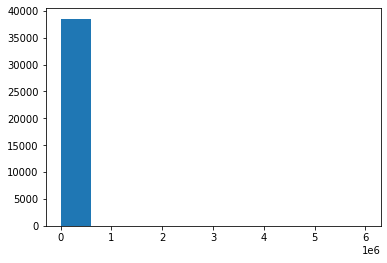

median = 58868.0 max = 6000000.0
loan_status     
Charged Off  0.5    53000.0
Fully Paid   0.5    60000.0
Name: annual_inc, dtype: float64
loan_status      
Charged Off  0.75    75000.0
Fully Paid   0.75    84000.0
Name: annual_inc, dtype: float64
loan_status     
Charged Off  1.0    1250000.0
Fully Paid   1.0    6000000.0
Name: annual_inc, dtype: float64
loan_status      
Charged Off  0.95    129697.2
Fully Paid   0.95    144000.0
Name: annual_inc, dtype: float64
loan_status      
Charged Off  0.75    74000.0
Fully Paid   0.75    81085.0
Name: annual_inc, dtype: float64


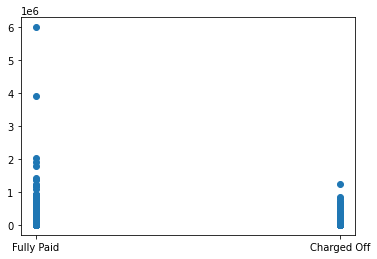

In [80]:
#Understanding of the annual_inc 

plt.hist(loans['annual_inc'])
plt.show()

print ("median = {0} max = {1}".format( loans['annual_inc'].median(), loans['annual_inc'].max()))

print(loans.groupby('loan_status').annual_inc.quantile([0.50]))
print(loans.groupby('loan_status').annual_inc.quantile([0.75]))
print(loans.groupby('loan_status').annual_inc.quantile([1]))
print(loans.groupby('loan_status').annual_inc.quantile([0.95]))

#It has been identified that the outlier in annual_inc is more than 200000
print(loans[loans.annual_inc < 200000].groupby('loan_status').annual_inc.quantile([0.75]))

#But there is no impact of the 0.75 quantile
plt.scatter(loans['loan_status'],loans['annual_inc'])
plt.show()




In [82]:
#Analysis home_ownership

loans_ownership_loanstatus = loans.groupby(['home_ownership','loan_status']).loan_status.count()
print(loans_ownership_loanstatus)
loans_ownership = loans.groupby(['home_ownership']).loan_status.count()
print(loans_ownership)
loans_ownership_loanstatus = loans_ownership_loanstatus.div(loans_ownership, level = 'home_ownership') * 100
print(loans_ownership_loanstatus)

#The above data clarifies that there is a very less change in the percentage contribution to the loan status

home_ownership  loan_status
MORTGAGE        Charged Off     2327
                Fully Paid     14694
NONE            Fully Paid         3
OTHER           Charged Off       18
                Fully Paid        80
OWN             Charged Off      443
                Fully Paid      2532
RENT            Charged Off     2839
                Fully Paid     15641
Name: loan_status, dtype: int64
home_ownership
MORTGAGE    17021
NONE            3
OTHER          98
OWN          2975
RENT        18480
Name: loan_status, dtype: int64
home_ownership  loan_status
MORTGAGE        Charged Off     13.671347
                Fully Paid      86.328653
NONE            Fully Paid     100.000000
OTHER           Charged Off     18.367347
                Fully Paid      81.632653
OWN             Charged Off     14.890756
                Fully Paid      85.109244
RENT            Charged Off     15.362554
                Fully Paid      84.637446
Name: loan_status, dtype: float64


In [84]:
#Analysis on verification_status


loans_verification_status = loans.groupby(['verification_status','loan_status']).agg({'loan_status': 'count'})
loans_verification_status['percentage'] = 100 * loans_verification_status['loan_status'] / loans_verification_status.groupby('verification_status')['loan_status'].transform('sum')
print(loans_verification_status)


#Not Verified source has lesser charged off percentage

                                 loan_status  percentage
verification_status loan_status                         
Not Verified        Charged Off         2142   12.830957
                    Fully Paid         14552   87.169043
Source Verified     Charged Off         1434   14.818642
                    Fully Paid          8243   85.181358
Verified            Charged Off         2051   16.803212
                    Fully Paid         10155   83.196788


In [86]:
#Analysis on purpose


loans_purpose = loans.groupby(['purpose','loan_status']).agg({'loan_status': 'count'})
loans_purpose['percentage'] = 100 * loans_purpose['loan_status'] / loans_purpose.groupby('purpose')['loan_status'].transform('sum')
print(loans_purpose)


#purpose has highest number charged off percentage for 'renewable_energy', 'small_business' more than 18%




                                loan_status  percentage
purpose            loan_status                         
car                Charged Off          160   10.673783
                   Fully Paid          1339   89.326217
credit_card        Charged Off          542   10.781778
                   Fully Paid          4485   89.218222
debt_consolidation Charged Off         2767   15.325395
                   Fully Paid         15288   84.674605
educational        Charged Off           56   17.230769
                   Fully Paid           269   82.769231
home_improvement   Charged Off          347   12.069565
                   Fully Paid          2528   87.930435
house              Charged Off           59   16.076294
                   Fully Paid           308   83.923706
major_purchase     Charged Off          222   10.325581
                   Fully Paid          1928   89.674419
medical            Charged Off          106   15.565345
                   Fully Paid           575   84

In [87]:
#Analysis on addr_state


loans_addr_state = loans.groupby(['addr_state','loan_status']).agg({'loan_status': 'count'})
loans_addr_state['percentage'] = 100 * loans_addr_state['loan_status'] / loans_addr_state.groupby('addr_state')['loan_status'].transform('sum')
print(loans_addr_state)


#addr_state -- no big impact



                        loan_status  percentage
addr_state loan_status                         
AK         Charged Off           15   19.230769
           Fully Paid            63   80.769231
AL         Charged Off           54   12.413793
           Fully Paid           381   87.586207
AR         Charged Off           27   11.489362
...                             ...         ...
WI         Fully Paid           377   85.681818
WV         Charged Off           21   12.209302
           Fully Paid           151   87.790698
WY         Charged Off            4    5.000000
           Fully Paid            76   95.000000

[97 rows x 2 columns]


In [89]:
#Analysis on grade




loans_grade = loans.groupby(['grade','loan_status']).agg({'loan_status': 'count'})
loans_grade['percentage'] = 100 * loans_grade['loan_status'] / loans_grade.groupby('grade')['loan_status'].transform('sum')
loans_grade.rename(columns={"loan_status": "loan_status_count"}, inplace=True)
loans_grade.reset_index()
print(loans_grade)


#grade -- Grade D E G and F has highest number of charged offs  more than 21%



                   loan_status_count  percentage
grade loan_status                               
A     Charged Off                602    5.993031
      Fully Paid                9443   94.006969
B     Charged Off               1425   12.205567
      Fully Paid               10250   87.794433
C     Charged Off               1347   17.194281
      Fully Paid                6487   82.805719
D     Charged Off               1118   21.986234
      Fully Paid                3967   78.013766
E     Charged Off                715   26.849418
      Fully Paid                1948   73.150582
F     Charged Off                319   32.684426
      Fully Paid                 657   67.315574
G     Charged Off                101   33.779264
      Fully Paid                 198   66.220736


In [91]:
#Analysis on sub_grade


loans_sub_grade = loans.groupby(['sub_grade','loan_status']).agg({'loan_status': 'count'})
loans_sub_grade['percentage'] = 100 * loans_sub_grade['loan_status'] / loans_sub_grade.groupby('sub_grade')['loan_status'].transform('sum')
print(loans_sub_grade)


#sub_grade -- Lower the sub_grade Further increases the charged off percentage

                       loan_status  percentage
sub_grade loan_status                         
A1        Charged Off           30    2.633889
          Fully Paid          1109   97.366111
A2        Charged Off           74    4.907162
          Fully Paid          1434   95.092838
A3        Charged Off          103    5.690608
...                            ...         ...
G3        Fully Paid            26   57.777778
G4        Charged Off           13   24.074074
          Fully Paid            41   75.925926
G5        Charged Off           10   34.482759
          Fully Paid            19   65.517241

[70 rows x 2 columns]


                   home_ownership  percentage
grade loan_status                            
A     Charged Off             602    5.993031
      Fully Paid             9443   94.006969
B     Charged Off            1425   12.205567
      Fully Paid            10250   87.794433
C     Charged Off            1347   17.194281
      Fully Paid             6487   82.805719
D     Charged Off            1118   21.986234
      Fully Paid             3967   78.013766
E     Charged Off             715   26.849418
      Fully Paid             1948   73.150582
F     Charged Off             319   32.684426
      Fully Paid              657   67.315574
G     Charged Off             101   33.779264
      Fully Paid              198   66.220736


<AxesSubplot:xlabel='grade,loan_status'>

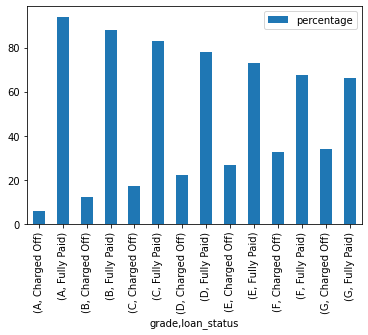

In [93]:
#Analysis grade using pivot table
pivot = loans.pivot_table(index =['grade','loan_status'], 
                       values =['home_ownership'], aggfunc ='count')


#table['% of Total'] = (table.C / table.C.sum() * 100).astype(str) + '%'
pivot['percentage'] = (pivot.home_ownership / pivot.groupby(level=0).home_ownership.transform(sum) * 100)
print(pivot)
pivot.plot.bar(y='percentage')

                        home_ownership  percentage
addr_state loan_status                            
AK         Charged Off              15   19.230769
           Fully Paid               63   80.769231
AL         Charged Off              54   12.413793
           Fully Paid              381   87.586207
AR         Charged Off              27   11.489362
...                                ...         ...
WI         Fully Paid              377   85.681818
WV         Charged Off              21   12.209302
           Fully Paid              151   87.790698
WY         Charged Off               4    5.000000
           Fully Paid               76   95.000000

[97 rows x 2 columns]


<AxesSubplot:xlabel='addr_state,loan_status'>

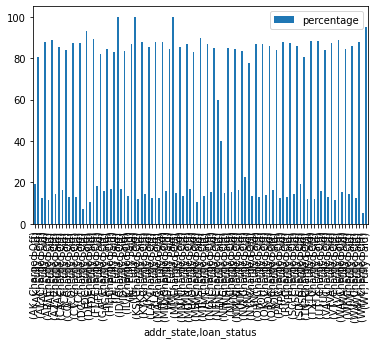

In [95]:
#Analysis addr_state using using pivot table
pivot = loans.pivot_table(index =['addr_state','loan_status'], 
                       values =['home_ownership'], aggfunc ='count')


#table['% of Total'] = (table.C / table.C.sum() * 100).astype(str) + '%'
pivot['percentage'] = (pivot.home_ownership / pivot.groupby(level=0).home_ownership.transform(sum) * 100)


print(pivot)
pivot.plot.figsize = (6,6)
pivot.plot.bar(y='percentage')

#Conclusion - no such impact

                         home_ownership  percentage
delinq_2yrs loan_status                            
0           Charged Off            4936   14.354679
            Fully Paid            29450   85.645321
1           Charged Off             507   15.809167
            Fully Paid             2700   84.190833
2           Charged Off             130   19.316493
            Fully Paid              543   80.683507
3           Charged Off              35   16.509434
            Fully Paid              177   83.490566
4           Charged Off              13   21.666667
            Fully Paid               47   78.333333
5           Charged Off               3   14.285714
            Fully Paid               18   85.714286
6           Charged Off               1   10.000000
            Fully Paid                9   90.000000
7           Charged Off               1   25.000000
            Fully Paid                3   75.000000
8           Charged Off               1   50.000000
            

<AxesSubplot:xlabel='delinq_2yrs,loan_status'>

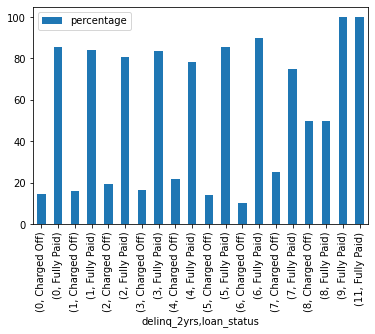

In [97]:
#Analysis delinq_2yrs

pivot_delinq_2yrs = loans.pivot_table(index =['delinq_2yrs','loan_status'], 
                       values =['home_ownership'], aggfunc ='count')


pivot_delinq_2yrs['percentage'] = (pivot_delinq_2yrs.home_ownership / pivot_delinq_2yrs.groupby(level=0).home_ownership.transform(sum) * 100)


print(pivot_delinq_2yrs)
pivot_delinq_2yrs.plot.bar(y='percentage')

#Conclusion - For more than 1 delinquency incidents, customer charged off percentage increases by 4%

                   home_ownership  percentage
dti   loan_status                            
0.00  Charged Off              29   16.292135
      Fully Paid              149   83.707865
0.01  Charged Off               1   33.333333
      Fully Paid                2   66.666667
0.02  Fully Paid                5  100.000000
...                           ...         ...
29.88 Fully Paid                1  100.000000
29.89 Fully Paid                1  100.000000
29.92 Fully Paid                2  100.000000
29.93 Fully Paid                3  100.000000
29.99 Fully Paid                1  100.000000

[5045 rows x 2 columns]


<AxesSubplot:xlabel='dti,loan_status'>

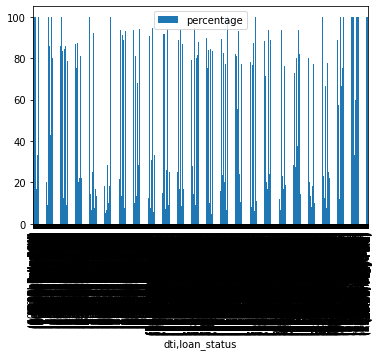

In [101]:
#Analysis dti ratio

pivot_dti = loans.pivot_table(index =['dti','loan_status'], 
                       values =['home_ownership'], aggfunc ='count')


pivot_dti['percentage'] = (pivot_dti.home_ownership / pivot_dti.groupby(level=0).home_ownership.transform(sum) * 100)


print(pivot_dti.loc[:"Charged Off"])
pivot_dti.plot.bar(y='percentage')

#Conclusion - No conclusion

                                 funded_amnt
range_funded_amount loan_status             
0.0                 Charged Off         1044
                    Fully Paid          6494
1.0                 Charged Off         1603
                    Fully Paid         10692
2.0                 Charged Off         1198
                    Fully Paid          7659
3.0                 Charged Off          815
                    Fully Paid          3889
4.0                 Charged Off          494
                    Fully Paid          2341
5.0                 Charged Off          268
                    Fully Paid          1165
6.0                 Charged Off           79
                    Fully Paid           337
7.0                 Charged Off          126
                    Fully Paid           373
                                 funded_amnt  percentage
range_funded_amount loan_status                         
0.0                 Charged Off         1044   13.849828
                   

/var/folders/kp/4mdlby_s1_n2rndtn7k_2kd0_rkjpd/T/ipykernel_14410/2320893988.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans_segment['range_funded_amount'] = loans_segment['funded_amnt'] / 5000
/var/folders/kp/4mdlby_s1_n2rndtn7k_2kd0_rkjpd/T/ipykernel_14410/2320893988.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans_segment['range_funded_amount'] = loans_segment['range_funded_amount'].apply(np.floor)


<AxesSubplot:xlabel='range_funded_amount,loan_status'>

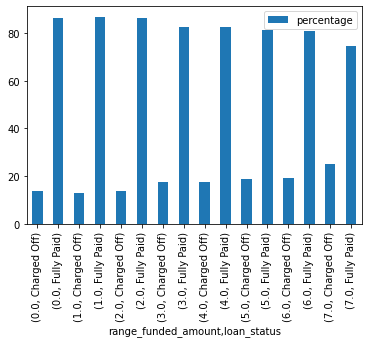

In [102]:
#Analysis funded_amnt

loans_segment = loans[["loan_status", "funded_amnt"]]

loans_segment['range_funded_amount'] = loans_segment['funded_amnt'] / 5000
loans_segment['range_funded_amount'] = loans_segment['range_funded_amount'].apply(np.floor)


pivot_loans_segment = loans_segment.pivot_table(index =['range_funded_amount','loan_status'], 
                       values =['funded_amnt'], aggfunc ='count')

print(pivot_loans_segment)
pivot_loans_segment['percentage'] = (pivot_loans_segment.funded_amnt / pivot_loans_segment.groupby(level=0).funded_amnt.transform(sum) * 100)
print(pivot_loans_segment)
pivot_loans_segment.plot.bar(y='percentage')

#Conclusion - Charge off percentage increases with the increase in funded_amnt it is more than 18% if the
#funded amount goes beyond 25K

                             total_acc
range_total_acc loan_status           
0.0             Charged Off        122
                Fully Paid         476
1.0             Charged Off        668
                Fully Paid        3407
2.0             Charged Off       1007
                Fully Paid        5466
3.0             Charged Off       1010
                Fully Paid        5925
4.0             Charged Off        873
                Fully Paid        5561
5.0             Charged Off        666
                Fully Paid        4366
6.0             Charged Off        504
                Fully Paid        3105
7.0             Charged Off        354
                Fully Paid        2036
8.0             Charged Off        208
                Fully Paid        1139
9.0             Charged Off        115
                Fully Paid         681
10.0            Charged Off         38
                Fully Paid         401
11.0            Charged Off         28
                Fully Pai

/var/folders/kp/4mdlby_s1_n2rndtn7k_2kd0_rkjpd/T/ipykernel_14410/948898598.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans_segment['range_total_acc'] = loans_segment['total_acc'] / 5
/var/folders/kp/4mdlby_s1_n2rndtn7k_2kd0_rkjpd/T/ipykernel_14410/948898598.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans_segment['range_total_acc'] = loans_segment['range_total_acc'].apply(np.floor)


<AxesSubplot:xlabel='range_total_acc,loan_status'>

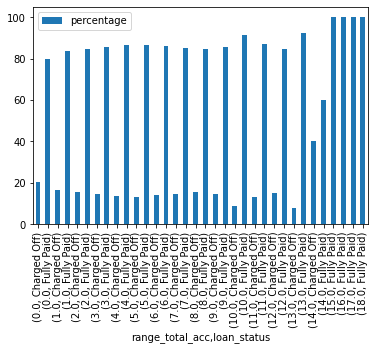

In [103]:
#Analysis total_acc

loans_segment = loans[["loan_status", "total_acc"]]

loans_segment['range_total_acc'] = loans_segment['total_acc'] / 5
loans_segment['range_total_acc'] = loans_segment['range_total_acc'].apply(np.floor)


pivot_loans_segment = loans_segment.pivot_table(index =['range_total_acc','loan_status'], 
                       values =['total_acc'], aggfunc ='count')

print(pivot_loans_segment)
pivot_loans_segment['percentage'] = (pivot_loans_segment.total_acc / pivot_loans_segment.groupby(level=0).total_acc.transform(sum) * 100)
print(pivot_loans_segment)
pivot_loans_segment.plot.bar(y='percentage')

#Conclusion - Charge off percentage increases with the (0-5) in total_acc it is more than 15% which is base average